In [3]:
pip install pyforest


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14632 sha256=d7132f4084902fb5b49f739da6302864a705c929e768a99428f6c34e3c477c8d
  Stored in directory: c:\users\jitendra\appdata\local\pip\cache\wheels\18\07\8c\5706b41a93ff7084fe45c880a6180b7278c08c31f1852660ea
Successfully built pyforest
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pyforest
import statsmodels.tsa.arima_model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_squared_error


In [24]:
import pandas as pd
df=pd.read_csv('us_covid19_daily.csv',parse_dates=['Date'])
df

C:\Users\jitendra\AppData\Local\Temp\ipykernel_18032\1420279026.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df=pd.read_csv('us_covid19_daily.csv',parse_dates=['Date'])


,Date,Positive,Hospitalized,Death
0,2020-03-17,10021,325,124
1,2020-03-18,13385,416,155
2,2020-03-19,18085,617,203
3,2020-03-20,24197,1042,273
4,2020-03-21,31013,1492,335
...,...,...,...,...
260,2020-12-02,13711156,100322,264522
261,2020-12-03,13921360,100755,267228
262,2020-12-04,14146191,101276,269791
263,2020-12-05,14357264,101190,272236


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          265 non-null    datetime64[ns]
 1   Positive      265 non-null    int64         
 2   Hospitalized  265 non-null    int64         
 3   Death         265 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 8.4 KB


In [31]:
df.set_index('Date',inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [33]:
df

,Positive,Hospitalized,Death
Date,,,
2020-03-17,10021,325,124
2020-03-18,13385,416,155
2020-03-19,18085,617,203
2020-03-20,24197,1042,273
2020-03-21,31013,1492,335
...,...,...,...
2020-12-02,13711156,100322,264522
2020-12-03,13921360,100755,267228
2020-12-04,14146191,101276,269791


In [38]:
df_hosp=df['Hospitalized']
df_hosp.head()

Date
2020-03-17     325
2020-03-18     416
2020-03-19     617
2020-03-20    1042
2020-03-21    1492
Name: Hospitalized, dtype: int64

<Axes: xlabel='Date'>

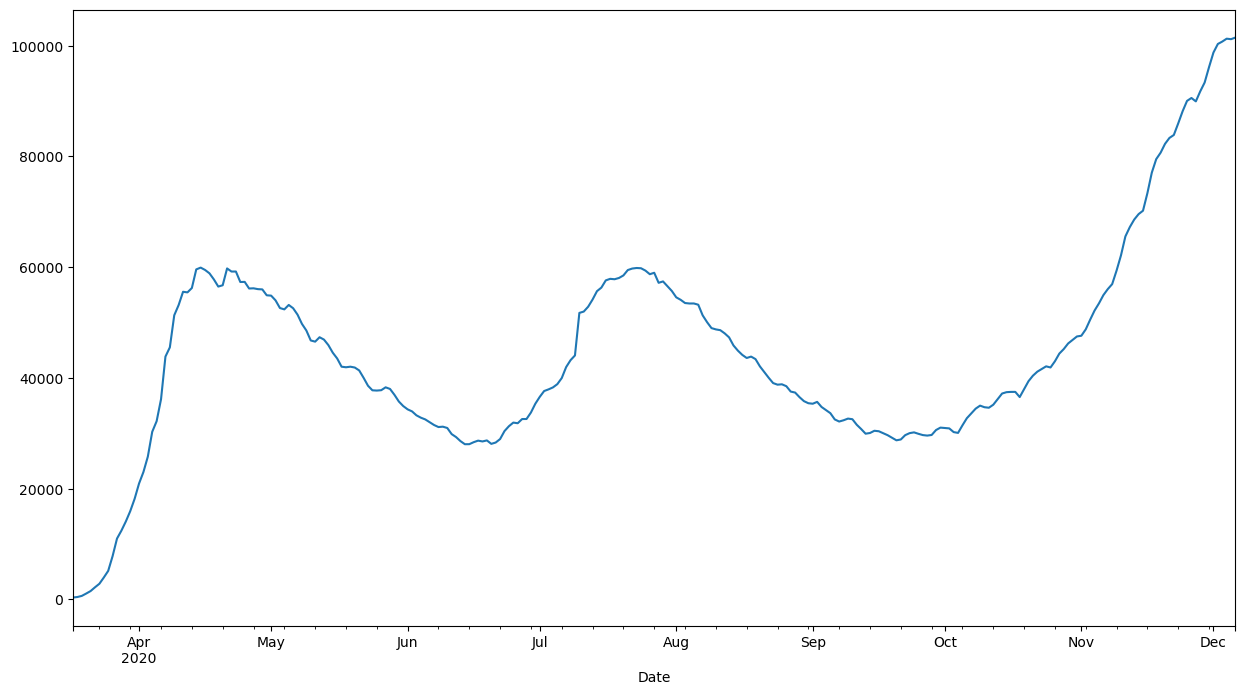

In [44]:
from   pylab                           import rcParams
rcParams['figure.figsize']=15,8
df_hosp.plot()

<IPython.core.display.Javascript object>

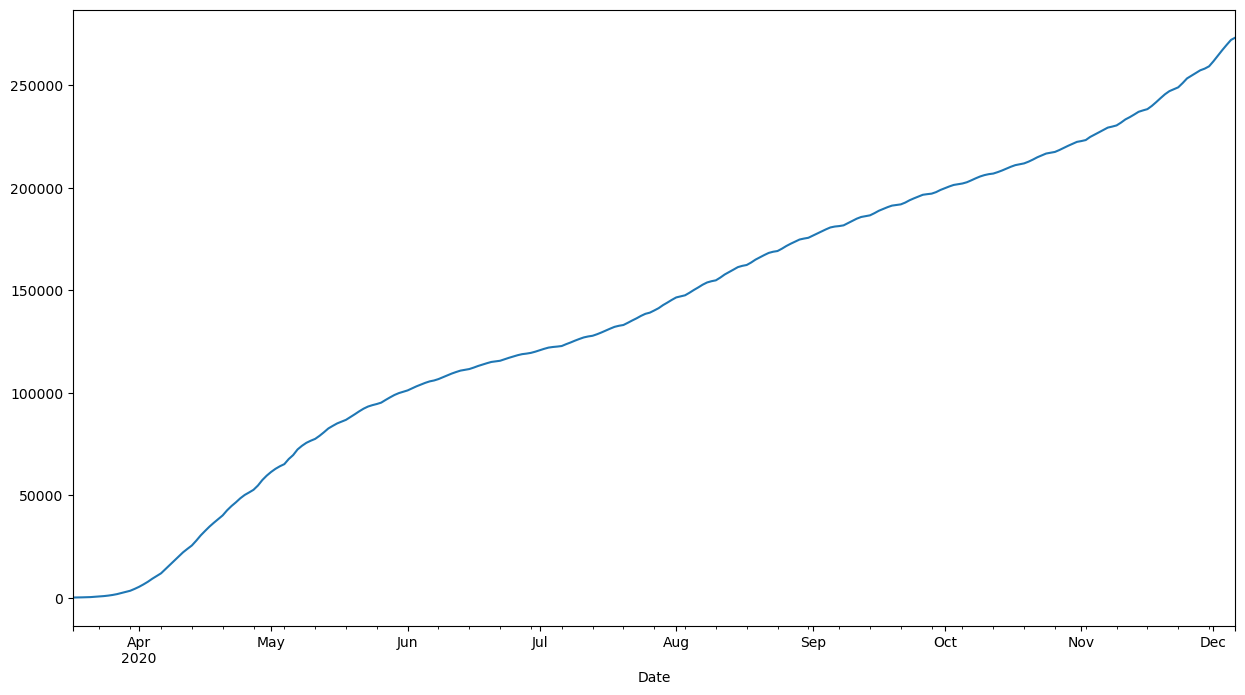

<IPython.core.display.Javascript object>

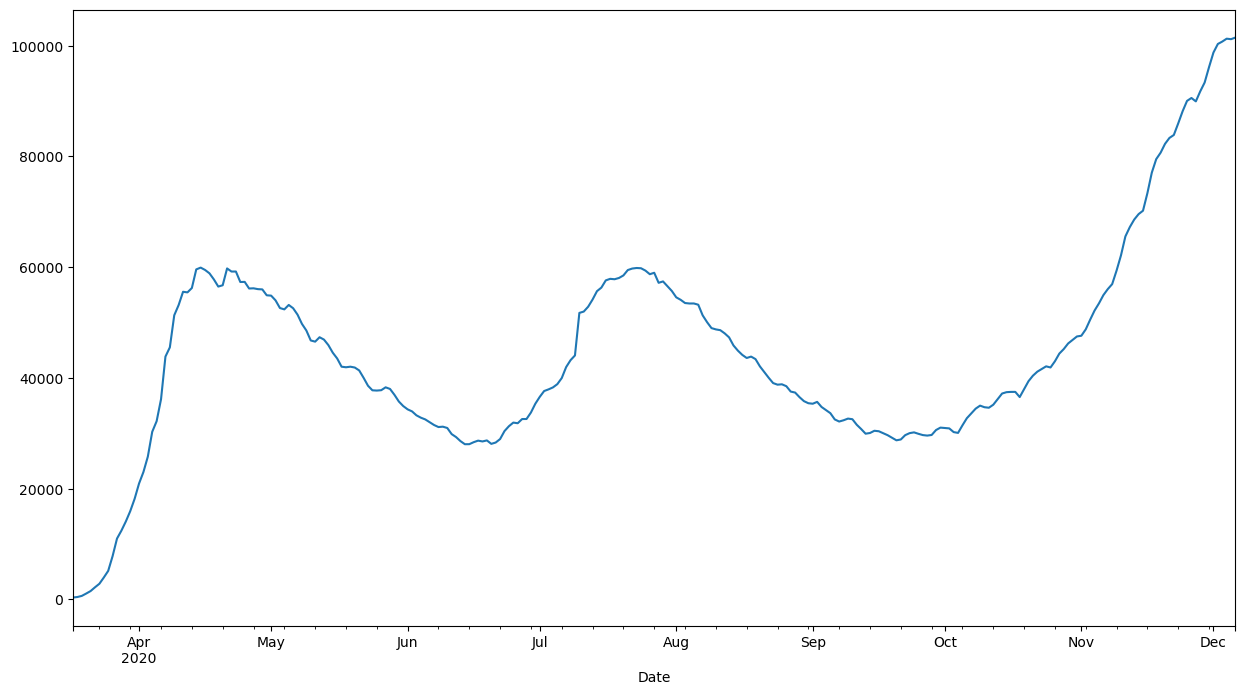

<IPython.core.display.Javascript object>

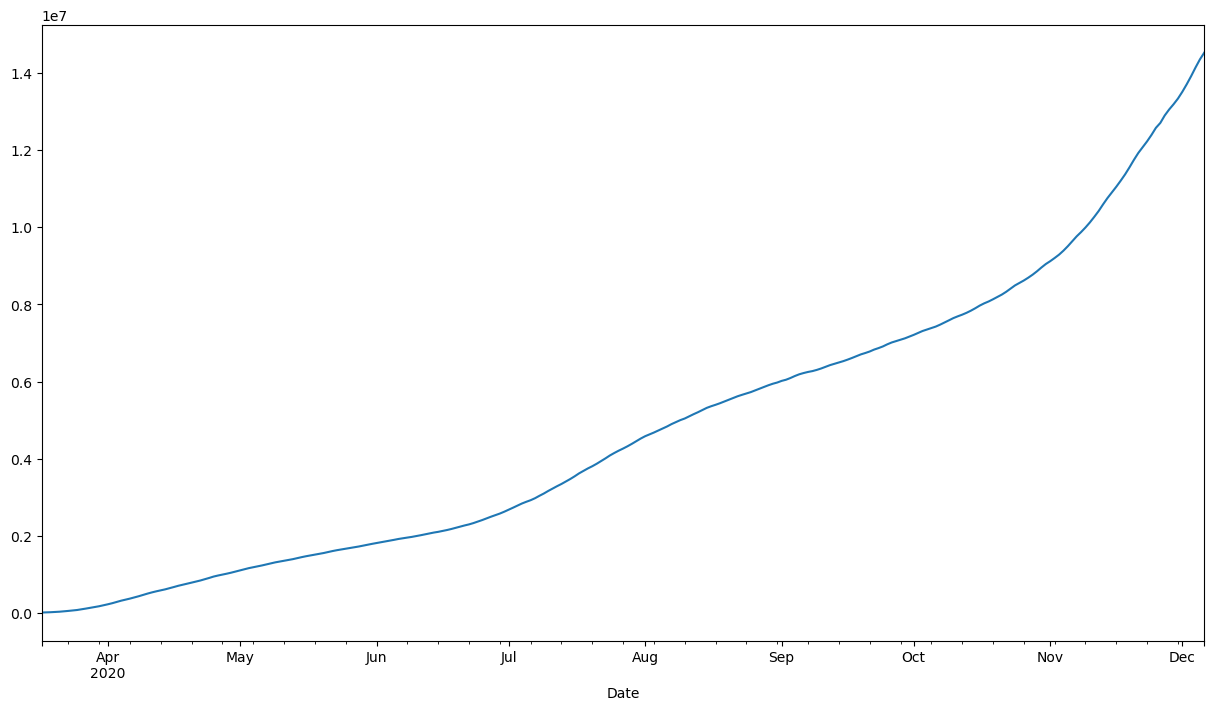

In [49]:
df.Death.plot()
plt.show()
df.Hospitalized.plot()
plt.show()
df.Positive.plot()
plt.show()


<IPython.core.display.Javascript object>

<Axes: xlabel='Date'>

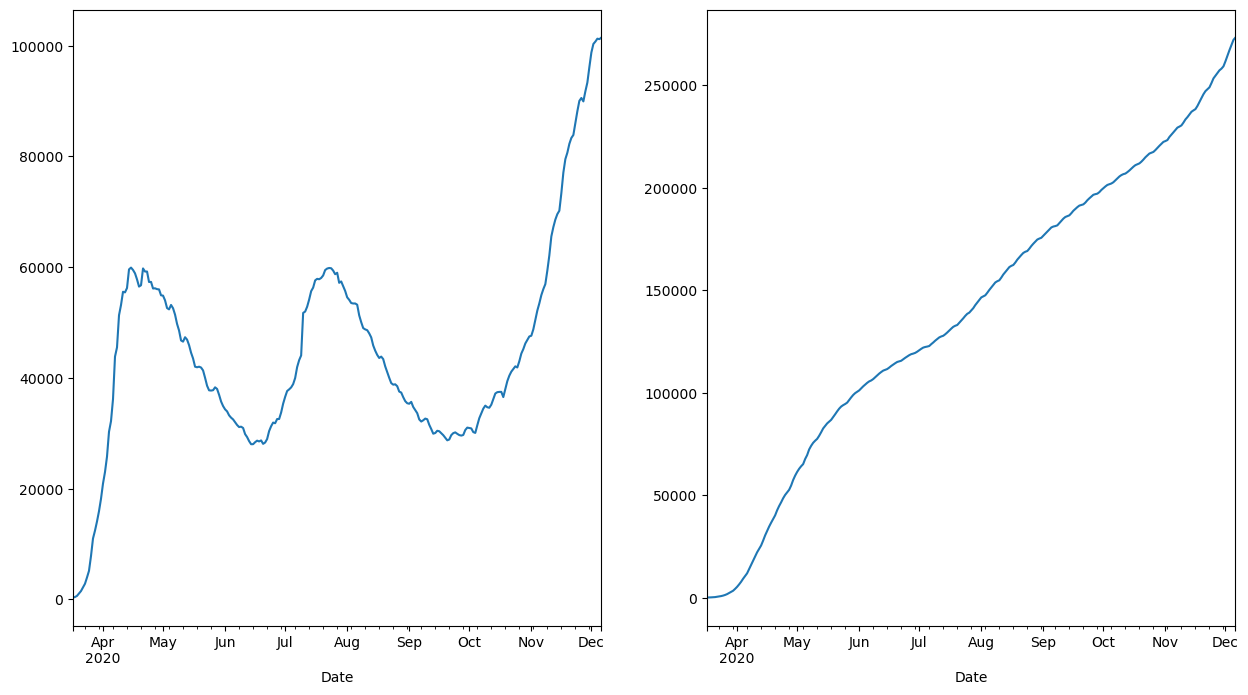

In [51]:
fig, axs = plt.subplots(1,2)

df['Hospitalized'].plot(ax=axs[0])
df['Death'].plot(ax=axs[1])